<a href="https://colab.research.google.com/github/AnukaMithara/Food-Demand-Forecasting-Data-Mining-Project/blob/main/Final_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EC 9560: DATA MINING**
# **MINI GROUP PROJECT**


### *Final Models*
### *With one-Hot Encode method*
### Models ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'XGBoost', 'LightGBM']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
!pip install --quiet optuna

In [ ]:
# Read the training data from a CSV file into a DataFrame
train = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/train_GzS76OK/train.csv')

# Read the fulfilment center information from a CSV file into a DataFrame
fulfilment_center_info = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/train_GzS76OK/fulfilment_center_info.csv')

# Read the meal information from a CSV file into a DataFrame
meal_info = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/train_GzS76OK/meal_info.csv')

# Read the testing data from a CSV file into a DataFrame
test = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/test_QoiMO9B.csv')

In [ ]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


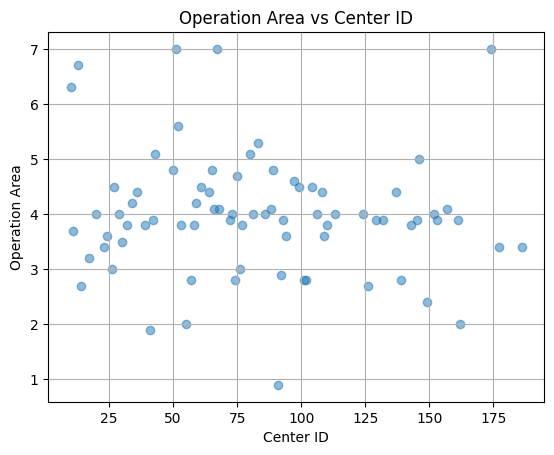

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'fulfilment_center_info' is your DataFrame
# Replace 'fulfilment_center_info' with your actual DataFrame variable

# Extract 'center_id' and 'op_area' columns
center_id = fulfilment_center_info['center_id']
op_area = fulfilment_center_info['op_area']

# Create a scatter plot
plt.scatter(center_id, op_area, alpha=0.5)
plt.title('Operation Area vs Center ID')
plt.xlabel('Center ID')
plt.ylabel('Operation Area')
plt.grid(True)
plt.show()


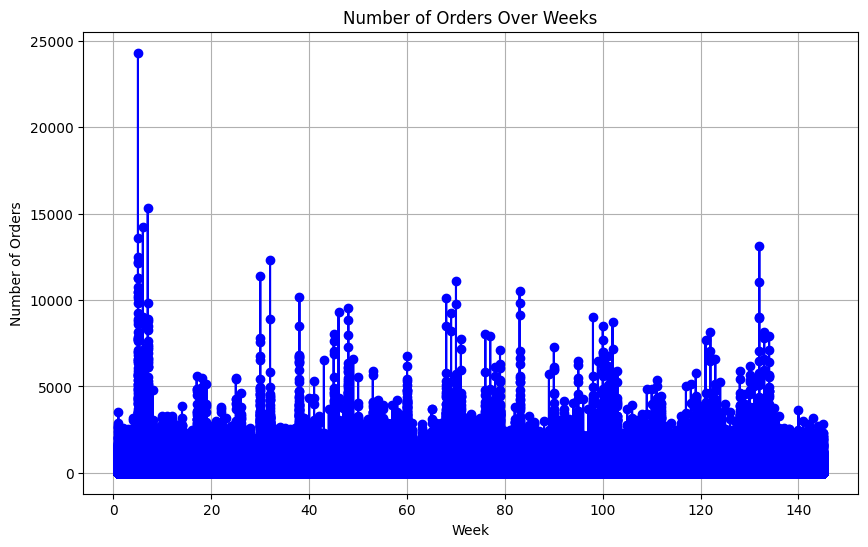

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting orders against week
plt.figure(figsize=(10, 6))
plt.plot(train['week'], train['num_orders'], marker='o', linestyle='-', color='b')
plt.title('Number of Orders Over Weeks')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


<ipython-input-66-74d70a4b4ace>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequency, np.abs(orders_fft) / n, markerfmt=' ', basefmt="-", use_line_collection=True)


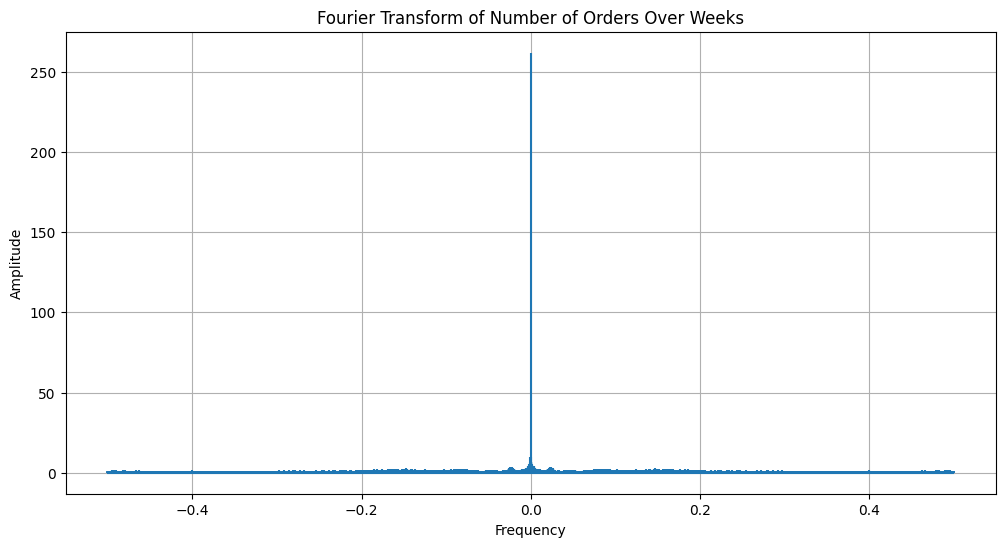

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Assuming your train dataset is a Pandas DataFrame named 'train_data'
# Replace 'your_train_dataset.csv' with the actual path if your data is in a CSV file
# train_data = pd.read_csv('your_train_dataset.csv')

# Extract relevant columns
weeks = train['week']
num_orders = train['num_orders']

# Perform Fourier Transform
n = len(weeks)
frequency = np.fft.fftfreq(n)
orders_fft = fft(num_orders)

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.stem(frequency, np.abs(orders_fft) / n, markerfmt=' ', basefmt="-", use_line_collection=True)
plt.title('Fourier Transform of Number of Orders Over Weeks')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [ ]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
print('Shape of the train set = ',train.shape)
print('Shape of the fulfilment center information set = ',fulfilment_center_info.shape)
print('Shape of the meal information set = ',meal_info.shape)

Shape of the train set =  (456548, 9)
Shape of the fulfilment center information set =  (77, 5)
Shape of the meal information set =  (51, 3)


In [ ]:
print("Count of Unique center_ids in Train Dataset:", train['center_id'].nunique())
print("Count of Unique meal_ids in Train Dataset:", train['meal_id'].nunique())


Count of Unique center_ids in Train Dataset: 77
Count of Unique meal_ids in Train Dataset: 51


In [ ]:
# Checking Null values

print('Total Null values for the train datset = ',train.isnull().sum().sum())
print('Total Null values for the fulfilment center information datset = ',fulfilment_center_info.isnull().sum().sum())
print('Total Null values for the meal information datset = ',meal_info.isnull().sum().sum())


Total Null values for the train datset =  0
Total Null values for the fulfilment center information datset =  0
Total Null values for the meal information datset =  0


In [ ]:
import pandas as pd

# Assuming 'train' and 'fulfilment_center_info' are your DataFrames
# Replace them with your actual DataFrame variables

# Merge the two DataFrames based on the 'center_id' column
train = pd.merge(train, fulfilment_center_info[['center_id', 'center_type', 'op_area']], on='center_id', how='left')


In [ ]:
train = pd.merge(train, meal_info[['meal_id', 'category', 'cuisine']], on='meal_id', how='left')

In [ ]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,TYPE_C,2.0,Beverages,Indian


In [ ]:
import pandas as pd

# Assuming 'train' and 'fulfilment_center_info' are your DataFrames
# Replace them with your actual DataFrame variables

# Merge the two DataFrames based on the 'center_id' column
test = pd.merge(test, fulfilment_center_info[['center_id', 'center_type', 'op_area']], on='center_id', how='left')


In [ ]:
test = pd.merge(test, meal_info[['meal_id', 'category', 'cuisine']], on='meal_id', how='left')

In [ ]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,TYPE_C,2.0,Beverages,Indian


In [ ]:
train.isnull().sum().sum()

0

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
train.shape

(456548, 13)

In [ ]:
test.shape

(32573, 12)

In [ ]:
promotions_applied_df = train[train['emailer_for_promotion'] == 1]
meal_count = promotions_applied_df['meal_id'].count()
print('Promotion voucher meals count:', meal_count)


Promotion voucher meals count: 37050


In [ ]:
promotions_applied_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_type,op_area,category,cuisine
14,1378227,1,55,1109,264.84,297.79,1,0,756,TYPE_C,2.0,Rice Bowl,Indian
20,1044821,1,55,1971,259.99,320.13,1,1,798,TYPE_C,2.0,Sandwich,Italian
24,1338119,1,55,1558,583.03,610.13,1,0,162,TYPE_C,2.0,Pizza,Continental
25,1188372,1,55,2581,583.03,612.13,1,0,312,TYPE_C,2.0,Pizza,Continental
26,1440008,1,55,1962,582.03,612.13,1,0,231,TYPE_C,2.0,Pizza,Continental
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456434,1411039,145,68,2306,242.53,335.62,1,0,15,TYPE_B,4.1,Pasta,Italian
456478,1151893,145,51,2306,244.50,337.62,1,0,80,TYPE_A,7.0,Pasta,Italian
456513,1261448,145,61,1778,150.41,157.14,1,0,271,TYPE_A,4.5,Beverages,Italian
456514,1071621,145,61,1062,159.08,153.26,1,0,378,TYPE_A,4.5,Beverages,Italian


In [ ]:
homepage_featured_df = train[train['homepage_featured'] == 1]
meal_count = homepage_featured_df['meal_id'].count()
print('Promotion voucher meals count:', meal_count)


Promotion voucher meals count: 49855


In [ ]:
import pandas as pd
from scipy import stats

# Assuming your DataFrame is named 'train_set'
# Replace the following column names with your actual column names if they are different
columns_to_check = ['checkout_price', 'base_price', 'num_orders']

# Calculate Z-scores for the specified columns
z_scores = stats.zscore(train[columns_to_check])

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 2

# Create a boolean mask for outliers
outliers_mask = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers from the DataFrame
train_no_outliers = train[~outliers_mask]

# Display the shape of the original and modified DataFrames
print("Original Shape:", train.shape)
print("Shape after removing outliers:", train_no_outliers.shape)


Original Shape: (456548, 13)
Shape after removing outliers: (407850, 13)


In [ ]:
# List of features to one-hot encode
features_to_encode = ['center_id','meal_id','center_type','category', 'cuisine']

# Perform one-hot encoding
train_encoded = pd.get_dummies(train, columns=features_to_encode)

# Now 'train_encoded' contains the one-hot encoded DataFrame
train_encoded

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,center_id_10,center_id_11,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,136.83,152.29,0,0,177,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1466964,1,136.83,135.83,0,0,270,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1346989,1,134.86,135.86,0,0,189,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1338232,1,339.50,437.53,0,0,54,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1448490,1,243.50,242.50,0,0,40,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,484.09,484.09,0,0,68,4.5,0,0,...,0,0,0,0,0,0,0,1,0,0
456544,1062036,145,482.09,482.09,0,0,42,4.5,0,0,...,0,0,0,0,0,0,0,1,0,0
456545,1110849,145,237.68,321.07,0,0,501,4.5,0,0,...,0,1,0,0,0,0,0,0,1,0
456546,1147725,145,243.50,313.34,0,0,729,4.5,0,0,...,0,1,0,0,0,0,0,0,1,0


## Split Data

In [ ]:
X_New=train_encoded.drop(["num_orders",'id'],axis=1)
y_New=train_encoded["num_orders"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train_New, x_test_New, y_train_New, y_test_New= train_test_split(X_New, y_New, test_size= 0.2, random_state=0)

In [ ]:
x_train_New

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,op_area,center_id_10,center_id_11,center_id_13,center_id_14,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
141016,48,277.45,277.45,0,0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
406574,130,414.25,413.25,0,0,3.8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
189872,64,457.90,639.23,1,0,5.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
323934,105,411.28,486.03,0,0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142275,48,620.86,620.86,0,0,3.4,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152315,52,276.45,310.43,0,0,2.4,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
439107,140,243.53,243.53,0,0,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
117952,41,164.93,163.93,0,0,3.6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
435829,139,206.61,208.61,0,0,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_test_New

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,op_area,center_id_10,center_id_11,center_id_13,center_id_14,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
242838,80,292.03,291.03,0,1,4.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
314826,102,121.31,119.31,0,0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
57041,20,282.33,282.33,0,0,4.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
87123,30,197.94,197.94,0,0,3.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
154611,52,303.64,302.64,0,0,3.8,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231834,77,195.00,243.53,0,0,2.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
161380,55,484.03,679.03,1,1,3.6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
173848,59,226.01,226.01,0,0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
243709,80,195.03,290.03,0,0,5.1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Train the models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import r2_score,mean_squared_log_error
from math import sqrt

import xgboost as xgb
import optuna

In [ ]:
def objective(trial):
    # Define the hyperparameter search space
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Initialize and fit the model
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=0)
    model.fit(x_train_New, y_train_New)

    # Make predictions
    preds = model.predict(x_test_New)

    # Calculate the RMSLE
    rmsle = np.sqrt(mean_squared_log_error(y_test_New, preds))

    return rmsle

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params

# Print the best parameters
print(f"Best parameters: {best_params}")

# Print the best RMSLE
print(f"Best RMSLE: {study.best_value}")


[I 2023-12-09 20:15:07,695] A new study created in memory with name: no-name-8b6d5238-7d5f-4bb6-a296-0b4d3ee3b254
[I 2023-12-09 20:15:16,198] Trial 0 finished with value: 0.5429938922758147 and parameters: {'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.5429938922758147.
[I 2023-12-09 20:15:31,013] Trial 1 finished with value: 0.5289953408606926 and parameters: {'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.5289953408606926.
[I 2023-12-09 20:15:40,064] Trial 2 finished with value: 0.5885164458322003 and parameters: {'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.5289953408606926.
[I 2023-12-09 20:15:48,305] Trial 3 finished with value: 0.5260363322673304 and parameters: {'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 3 with value: 0.5260363322673304.
[I 2023-12-09 20:15:57,684] Trial 4 finished with value: 0.54

Best parameters: {'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 10}
Best RMSLE: 0.5192799583291581


In [ ]:
def objective(trial):
    # Define the hyperparameter search space
    max_depth = trial.suggest_int('max_depth', 2, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    gamma = trial.suggest_float('gamma', 0.01, 1, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)

    # Initialize and fit the model
    model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, gamma=gamma, min_child_weight=min_child_weight, random_state=0)
    model.fit(x_train_New, y_train_New)

    # Make predictions
    preds = model.predict(x_test_New)

    preds[preds < 0] = 0

    # Calculate the RMSLE
    rmsle = np.sqrt(mean_squared_log_error(y_test_New, preds))

    return rmsle

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params

# Print the best parameters
print(f"Best parameters: {best_params}")

# Print the best RMSLE
print(f"Best RMSLE: {study.best_value}")


[I 2023-12-09 21:00:34,775] A new study created in memory with name: no-name-cf4dcaa2-f76d-4338-9712-49e09ed7c40a
[I 2023-12-09 21:01:52,009] Trial 0 finished with value: 0.5431675027575436 and parameters: {'max_depth': 9, 'learning_rate': 0.20260986006025944, 'n_estimators': 533, 'gamma': 0.5016407048103483, 'min_child_weight': 5}. Best is trial 0 with value: 0.5431675027575436.
[I 2023-12-09 21:02:48,795] Trial 1 finished with value: 0.8570219021148664 and parameters: {'max_depth': 2, 'learning_rate': 0.015669505605380045, 'n_estimators': 637, 'gamma': 0.11057091668336363, 'min_child_weight': 8}. Best is trial 0 with value: 0.5431675027575436.
[I 2023-12-09 21:03:06,607] Trial 2 finished with value: 0.8970482986021174 and parameters: {'max_depth': 2, 'learning_rate': 0.05720205066763511, 'n_estimators': 175, 'gamma': 0.05076677540428149, 'min_child_weight': 4}. Best is trial 0 with value: 0.5431675027575436.
[I 2023-12-09 21:04:45,680] Trial 3 finished with value: 0.78837216415759 an

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import mean_squared_log_error
from math import sqrt
from pmdarima import auto_arima

# Define the objective function
def objective(trial):
    p = trial.suggest_int('p', 1, 5)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 1, 5)

    # Create the ARIMA model
    model = auto_arima(y_train_New, start_p=p, start_q=q,
                       max_p=5, max_q=5, m=12,
                       start_P=0, seasonal=False,
                       d=d, D=1, trace=False,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

    model.fit(y_train_New)

    # Make predictions
    arima_pred = model.predict(n_periods=len(y_test_New))
    arima_pred[arima_pred < 0] = 0
    # Calculate the RMSLE
    rmsle = sqrt(mean_squared_log_error(y_test_New, arima_pred))

    return rmsle

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best parameters and the best RMSLE value
print("Best parameters: ", study.best_params)
print("Best RMSLE value: ", study.best_value)


[I 2023-12-10 03:04:30,979] A new study created in memory with name: no-name-45c9b5f4-61b7-41a4-9111-152f0862e097
/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
[W 2023-12-10 03:16:04,174] Trial 0 failed with parameters: {'p': 1, 'd': 1, 'q': 4} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-37-b6056496f9cf>", line 13, in objective
    model = auto_arima(y_train_New, start_p=p, start_q=q,
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py", line 701, in auto_arima
    sorted_res = search.solve()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 288, in solve
    self._do_fit((p, d, q

KeyboardInterrupt: ignored

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 14)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )

    model.fit(x_train_New, y_train_New)
    preds = model.predict(x_test_New)
    preds[preds < 0] = 0
    rmsle = np.sqrt(mean_squared_log_error(y_test_New, preds))

    return rmsle

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best RMSLE: {best_score}")


In [ ]:
!pip install catboost optuna


In [ ]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_log_error
from math import sqrt
import numpy as np

def objective(trial):
    depth = trial.suggest_int('depth', 4, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-8, 100, log=True)
    iterations = trial.suggest_int('iterations', 50, 300)

    model = CatBoostRegressor(
        depth=depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        iterations=iterations,
        random_state=0,
        verbose=False
    )

    model.fit(x_train_New, y_train_New)
    preds = model.predict(x_test_New)
    preds[preds < 0] = 0
    rmsle = sqrt(mean_squared_log_error(y_test_New, preds))

    return rmsle

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best RMSLE: {best_score}")



# Best Models

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Best parameters from Optuna
best_max_depth = 32
best_min_samples_split = 2
best_min_samples_leaf = 10

# Initialize and fit the final model with the best parameters
DecisionTreeRegressorModel = DecisionTreeRegressor(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=0
)

DecisionTreeRegressorModel.fit(x_train_New, y_train_New)

# Make predictions on the test set
DTtest_preds = DecisionTreeRegressorModel.predict(x_test_New)

# Evaluate the performance on the test set
DTtest_rmsle = np.sqrt(mean_squared_log_error(y_test_New, DTtest_preds))

# Print the performance on the test set
print(f"RMSLE on the test set using the best model: {DTtest_rmsle}")


RMSLE on the test set using the best model: 0.5192799583291581


In [ ]:
import xgboost as xgb

# Best parameters from Optuna
best_max_depth = 10
best_learning_rate = 0.09398953526135162
best_n_estimators = 977
best_gamma = 0.03793322184648774
best_min_child_weight = 1

# Initialize and fit the final XGBoost model with the best parameters
XGBRegressorModel = xgb.XGBRegressor(
    max_depth=best_max_depth,
    learning_rate=best_learning_rate,
    n_estimators=best_n_estimators,
    gamma=best_gamma,
    min_child_weight=best_min_child_weight,
    random_state=0
)

XGBRegressorModel.fit(x_train_New, y_train_New)

# Make predictions on the test set
XGBtest_preds = XGBRegressorModel.predict(x_test_New)
XGBtest_preds[XGBtest_preds < 0] = 0  # Ensure predictions are non-negative

# Evaluate the performance on the test set
XGBtest_rmsle = np.sqrt(mean_squared_log_error(y_test_New, XGBtest_preds))

# Print the performance on the test set
print(f"RMSLE on the test set using the best XGBoost model: {XGBtest_rmsle}")


RMSLE on the test set using the best XGBoost model: 0.5106025917091314


In [ ]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100, random_state=0)
RandomForestRegressorModel.fit(x_train_New, y_train_New)

rf_pred = RandomForestRegressorModel.predict(x_test_New)

# Calculate the RMSLE
rfr_rmsle = sqrt(mean_squared_log_error(y_test_New, rf_pred))
print("RMSLE for Random Forest Regression: ", rfr_rmsle)


RMSLE for Random Forest Regression:  0.48374185598911645


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error

# Initialize and fit the LightGBM model
LGBMRegressorModel = lgb.LGBMRegressor(random_state=0)

LGBMRegressorModel.fit(x_train_New, y_train_New)

# Make predictions on the test set
test_preds_lgbm = LGBMRegressorModel.predict(x_test_New)
test_preds_lgbm[test_preds_lgbm < 0] = 0  # Ensure predictions are non-negative


# Evaluate the performance on the test set
test_rmsle_lgbm = np.sqrt(mean_squared_log_error(y_test_New, test_preds_lgbm))

# Print the performance on the test set
print(f"RMSLE on the test set using the LightGBM model: {test_rmsle_lgbm}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 980
[LightGBM] [Info] Number of data points in the train set: 365238, number of used features: 155
[LightGBM] [Info] Start training from score 261.996632
RMSLE on the test set using the LightGBM model: 0.7581767183932931


In [ ]:
LinearRegressionModel= LinearRegression()
LinearRegressionModel.fit(x_train_New,y_train_New)

Linearreg = LinearRegressionModel.predict(x_test_New)

# Replace negative predictions with 0.1
Linearreg[Linearreg < 0] = 0

# Calculate the RMSLE
linear_rmsle = sqrt(mean_squared_log_error(y_test_New, Linearreg))
print("RMSLE for LinearRegression: ", linear_rmsle)


RMSLE for LinearRegression:  1.7469405478206015


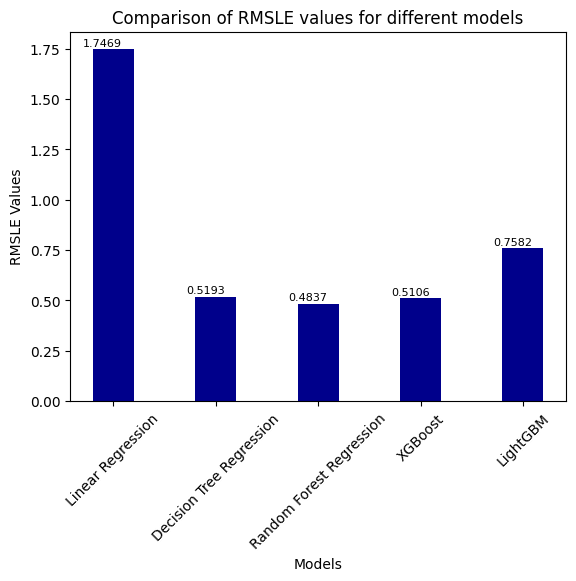

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'XGBoost', 'LightGBM']
rmsle_values = [linear_rmsle, DTtest_rmsle, rfr_rmsle, XGBtest_rmsle, test_rmsle_lgbm]

fig, ax = plt.subplots()
bars = ax.bar(models, rmsle_values, color='darkblue', width=0.4)

plt.xlabel("Models")
plt.ylabel("RMSLE Values")
plt.title("Comparison of RMSLE values for different models")

plt.xticks(rotation=45)

# Add RMSLE values on top of the bars
for bar, value in zip(bars, rmsle_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{value:.4f}', ha='center', va='bottom', color='black', fontsize=8)

plt.show()


## Model Testing for Unseen Data

In [ ]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,TYPE_C,2.0,Beverages,Indian


In [ ]:
test_New=test.drop(['id'],axis=1)
test_New.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_type,op_area,category,cuisine
0,146,55,1885,158.11,159.11,0,0,TYPE_C,2.0,Beverages,Thai
1,146,55,1993,160.11,159.11,0,0,TYPE_C,2.0,Beverages,Thai
2,146,55,2539,157.14,159.14,0,0,TYPE_C,2.0,Beverages,Thai
3,146,55,2631,162.02,162.02,0,0,TYPE_C,2.0,Beverages,Indian
4,146,55,1248,163.93,163.93,0,0,TYPE_C,2.0,Beverages,Indian


In [ ]:
test.shape

(32573, 12)

In [ ]:
test_New.shape

(32573, 11)

In [ ]:
features_to_encode = ['center_id','meal_id','center_type','category', 'cuisine']

# Perform one-hot encoding
test_New = pd.get_dummies(test_New, columns=features_to_encode)




### Linear Regression Model

### Random Forest Regression Model

In [ ]:
RandomForestRegressorPred = RandomForestRegressorModel.predict(test_New)
RandomForestRegressorPred[RandomForestRegressorPred < 0] = 0
RandomForestRegressorPred

array([124.32,  89.56, 140.8 , ..., 470.37, 323.54, 216.1 ])

In [ ]:
RandomForestRegressorPred.shape

(32573,)

In [ ]:
import numpy as np

rfr= {"id": test["id"], "num_orders":np.rint(RandomForestRegressorPred).astype(int) }
rfrdf = pd.DataFrame(rfr)
rfrdf

,id,num_orders
0,1028232,124
1,1127204,90
2,1212707,141
3,1082698,71
4,1400926,63
...,...,...
32568,1250239,87
32569,1039516,24
32570,1158107,470
32571,1444235,324


In [ ]:
rfrdf.to_csv('/content/drive/MyDrive/EC9560_MiniProject/Optimizing4/RandomForestRegressor.csv', index = False)

### Decision Tree Regression Model

In [ ]:
DecisionTreeRegressorModelPred = DecisionTreeRegressorModel.predict(test_New)
DecisionTreeRegressorModelPred[DecisionTreeRegressorModelPred < 0] = 0
DecisionTreeRegressorModelPred

array([151.72222222, 145.        , 100.21428571, ..., 474.66666667,
       220.04761905, 141.83333333])

In [ ]:
DecisionTreeRegressorModelPred.shape

(32573,)

In [ ]:
import numpy as np

dtr= {"id": test["id"], "num_orders":np.rint(DecisionTreeRegressorModelPred).astype(int) }
dtrdf = pd.DataFrame(dtr)
dtrdf

,id,num_orders
0,1028232,152
1,1127204,145
2,1212707,100
3,1082698,33
4,1400926,31
...,...,...
32568,1250239,75
32569,1039516,45
32570,1158107,475
32571,1444235,220


In [ ]:
dtrdf.to_csv('/content/drive/MyDrive/EC9560_MiniProject/Optimizing4/DicisionTree.csv', index = False)

#### XGBoost

In [ ]:
XGBRegressorModelPred = XGBRegressorModel.predict(test_New)
XGBRegressorModelPred[XGBRegressorModelPred < 0] = 0
XGBRegressorModelPred

array([172.74837 ,  55.160606, 121.67164 , ..., 287.77087 , 395.69107 ,
       161.83484 ], dtype=float32)

In [ ]:
XGBRegressorModelPred.shape

(32573,)

In [ ]:
import numpy as np

xgb= {"id": test["id"], "num_orders":np.rint(XGBRegressorModelPred).astype(int) }
xgbdf = pd.DataFrame(xgb)
xgbdf

,id,num_orders
0,1028232,173
1,1127204,55
2,1212707,122
3,1082698,65
4,1400926,46
...,...,...
32568,1250239,81
32569,1039516,50
32570,1158107,288
32571,1444235,396


In [ ]:
xgbdf.to_csv('/content/drive/MyDrive/EC9560_MiniProject/Optimizing4/XGBoost.csv', index = False)